In [1]:
%load_ext lab_black

In [2]:
import os

import numpy as np
import pandas as pd

from pykeen.pipeline import pipeline
from pykeen.datasets import PathDataSet

In [3]:
training_path = "../data/fb15k/toy/train.txt"
testing_path = "../data/fb15k/toy/test.txt"
dataset = PathDataSet(training_path, testing_path, testing_path)
dataset.summarize()

PathDataSet (create_inverse_triples=False)
Name          Entities    Relations    Triples
----------  ----------  -----------  ---------
Training          6884          990      28490
Testing           5135          634       9496
Validation        5135          634       9496


In [4]:
result = pipeline(
    dataset=dataset,
    model="TransE",
    model_kwargs=dict(embedding_dim=100),
    optimizer="Adam",
    training_kwargs=dict(num_epochs=100, use_tqdm_batch=False),
    negative_sampler="basic",
    negative_sampler_kwargs=dict(num_negs_per_pos=4),
    evaluator="RankBasedEvaluator",
    evaluator_kwargs=dict(ks=[10]),
    random_seed=34,
    device="cuda:0",
)
result.save_to_directory("toy_transe")

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...


INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=8192.


INFO:pykeen.evaluation.evaluator:Evaluation took 1.02s seconds


<AxesSubplot:title={'center':'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

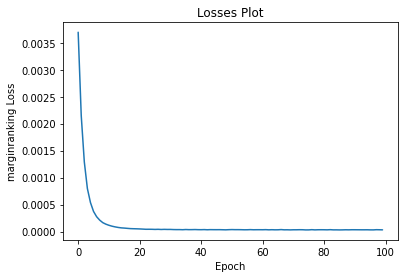

In [5]:
result.plot_losses()

In [6]:
result.metric_results.to_df()

,Side,Type,Metric,Value
0,both,avg,adjusted_mean_rank,0.103577
1,head,avg,adjusted_mean_rank,0.127980
2,tail,avg,adjusted_mean_rank,0.079174
3,both,best,mean_rank,348.407171
4,both,best,mean_reciprocal_rank,0.263768
5,both,best,hits_at_10,0.573821
6,both,worst,mean_rank,348.407645
7,both,worst,mean_reciprocal_rank,0.263768
8,both,worst,hits_at_10,0.573821
9,both,avg,mean_rank,348.407408
